In [1]:
import pandas as pd
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [2]:
logon_data = pd.read_csv(r'D:\clean R4\cleaned_logon.csv')

In [3]:
logon_data.head()

,id,date,user,pc,activity_Logon
0,X1D9-S0ES98JV-5357PWMI,2010-01-02 06:49:00,NGF0157,PC-6056,1
1,G2B3-L6EJ61GT-2222RKSO,2010-01-02 06:50:00,LRR0148,PC-4275,1
2,U6Q3-U0WE70UA-3770UREL,2010-01-02 06:53:04,LRR0148,PC-4124,1
3,I0N5-R7NA26TG-6263KNGM,2010-01-02 07:00:00,IRM0931,PC-7188,1
4,D1S0-N6FH62BT-5398KANK,2010-01-02 07:00:00,MOH0273,PC-6699,1


In [4]:
logon_data.info()
logon_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854859 entries, 0 to 854858
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              854859 non-null  object
 1   date            854859 non-null  object
 2   user            854859 non-null  object
 3   pc              854859 non-null  object
 4   activity_Logon  854859 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 32.6+ MB


,id,date,user,pc,activity_Logon
count,854859,854859,854859,854859,854859.000000
unique,854859,338041,1000,1003,NaN
top,T0U1-P7DT83QQ-7295ICZR,2010-01-05 08:00:00,WPR0368,PC-4124,NaN
freq,1,61,3470,25514,NaN
mean,NaN,NaN,NaN,NaN,0.550490
std,NaN,NaN,NaN,NaN,0.497445
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


## EDA

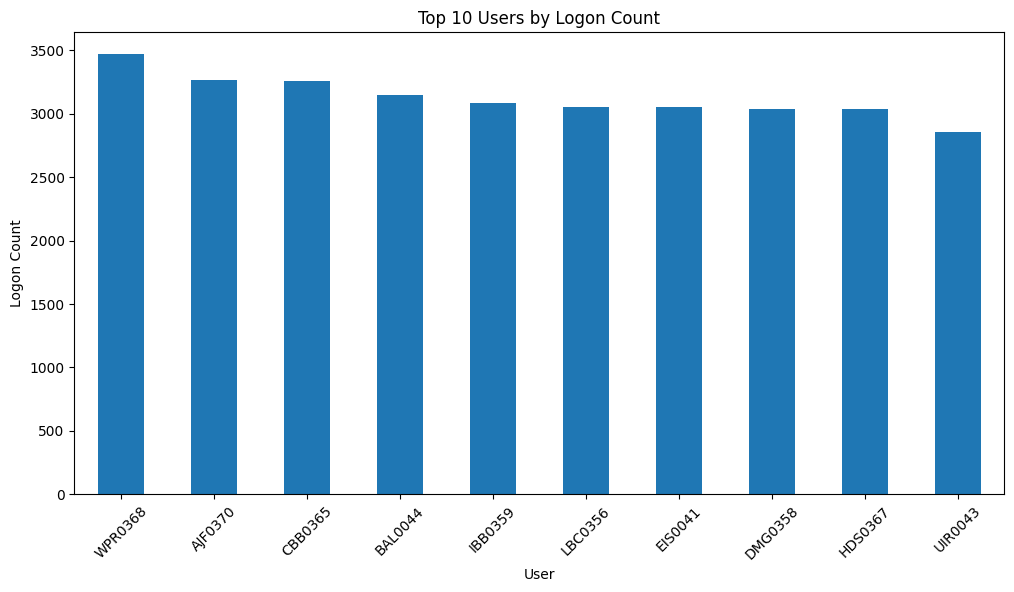

In [5]:
logon_data['user'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Users by Logon Count')
plt.xlabel('User')
plt.ylabel('Logon Count')
plt.xticks(rotation=45)
plt.show()

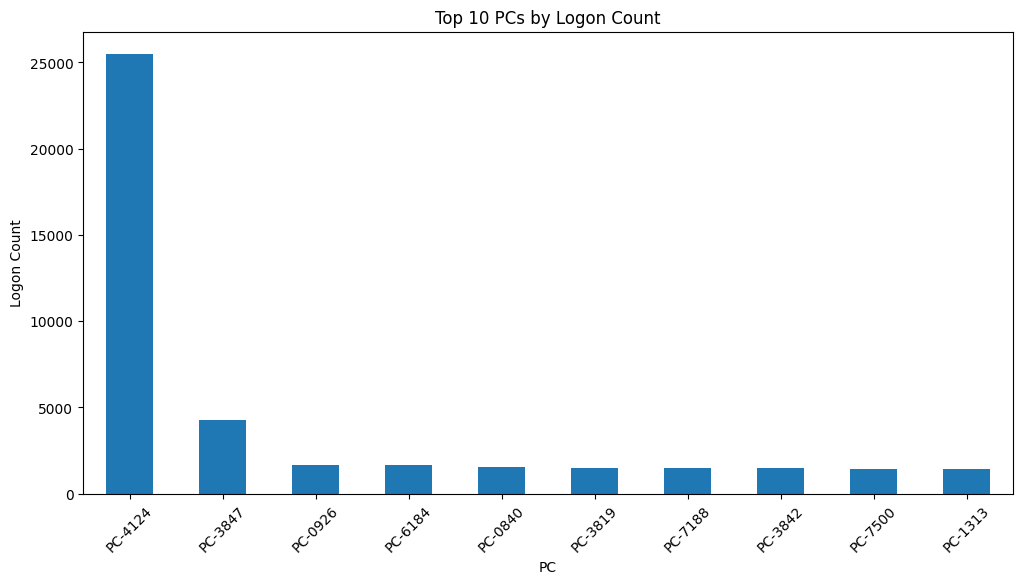

In [6]:
logon_data['pc'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 PCs by Logon Count')
plt.xlabel('PC')
plt.ylabel('Logon Count')
plt.xticks(rotation=45)
plt.show()

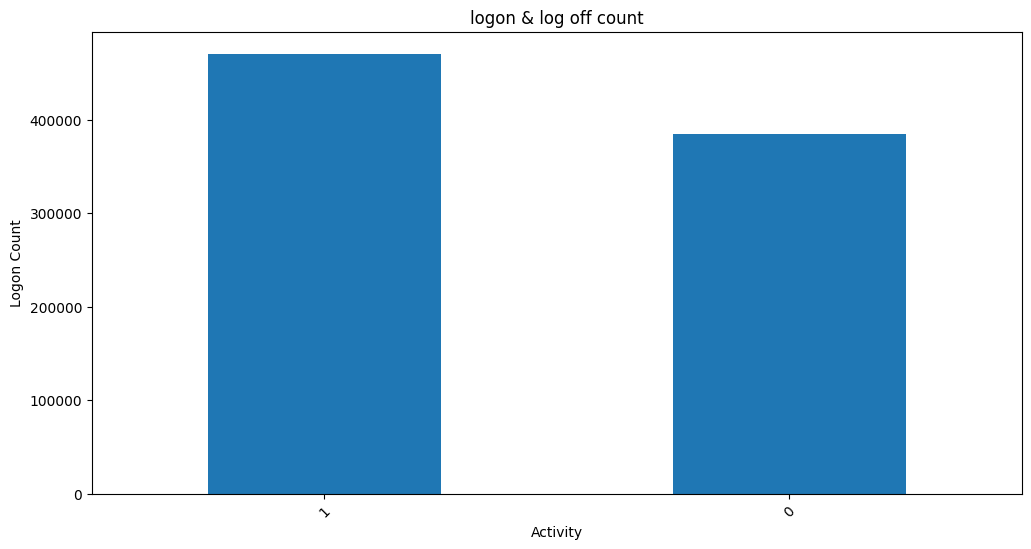

In [9]:
logon_data['activity_Logon'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('logon & log off count')
plt.xlabel('Activity')
plt.ylabel('Logon Count')
plt.xticks(rotation=45)
plt.show()

# check the time based pattern

In [10]:
logon_data['date'] = pd.to_datetime(logon_data['date'],errors='coerce')
logon_data['hour'] = logon_data['date'].dt.hour
logon_data['day_of_week'] = logon_data['date'].dt.date


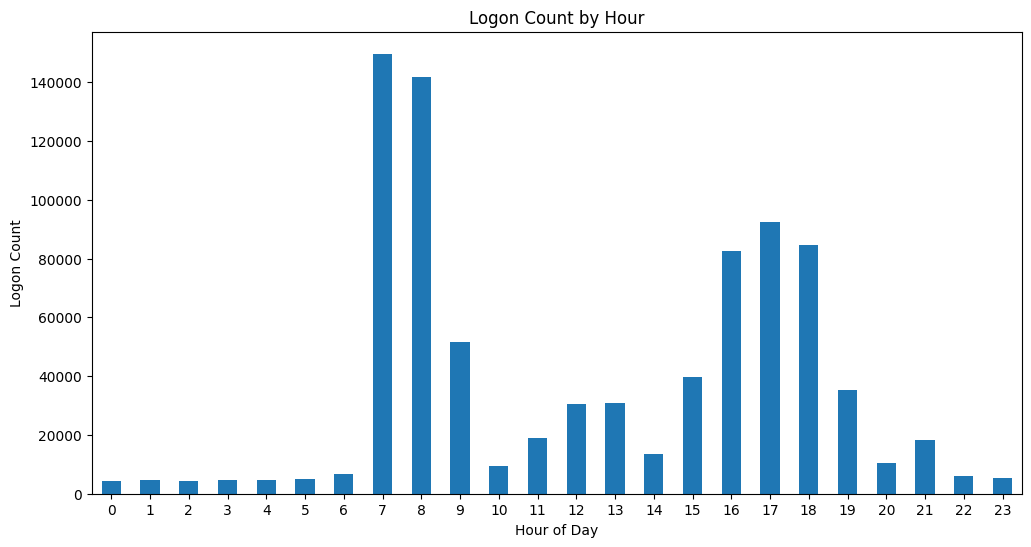

In [14]:
logon_data['hour'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Logon Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Logon Count')
plt.xticks(rotation=0)
plt.show()

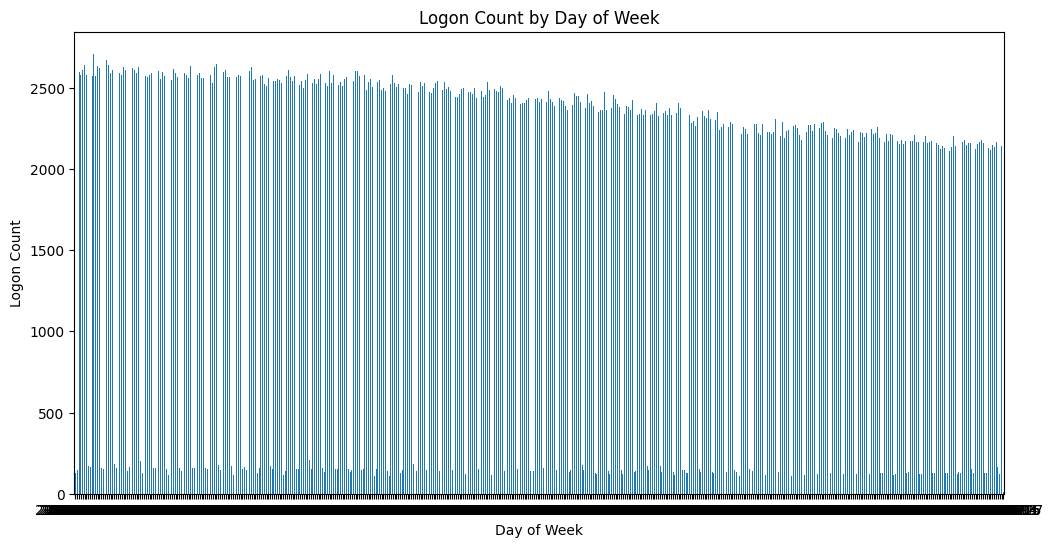

In [15]:
logon_data['day_of_week'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Logon Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Logon Count')
plt.xticks(rotation=0)
plt.show()

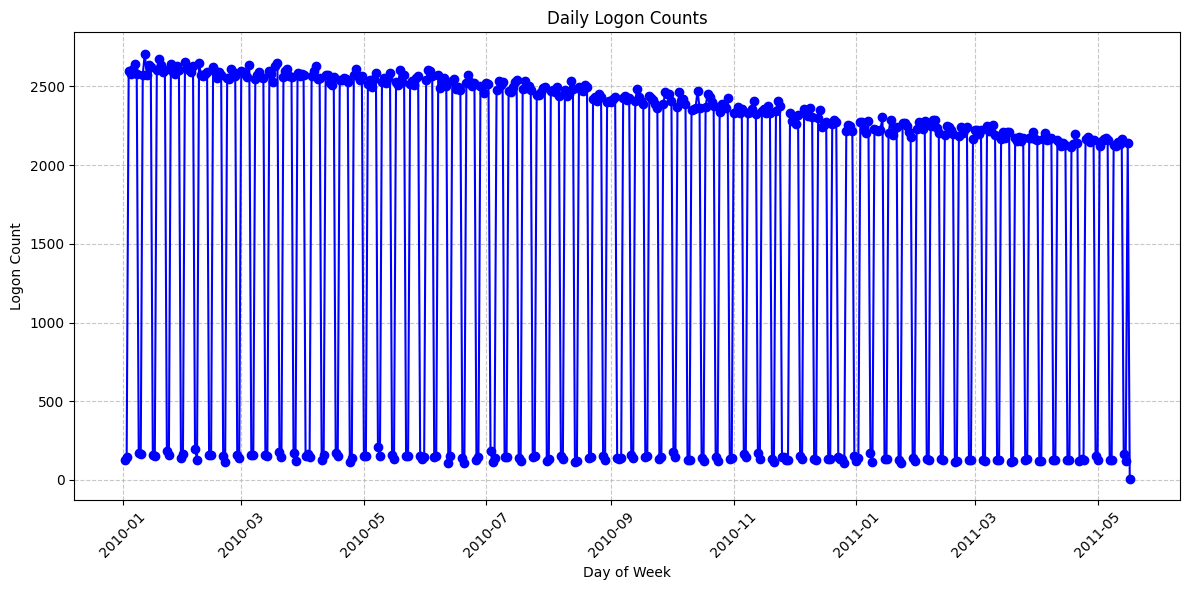

In [16]:
daily_logon_counts = logon_data.groupby('day_of_week').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_logon_counts.index, daily_logon_counts.values, marker='o', linestyle='-', color='b')

plt.title('Daily Logon Counts')
plt.xlabel('Day of Week')
plt.ylabel('Logon Count')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
print("unique users:", logon_data['user'].nunique())
print("unique PCs:", logon_data['pc'].nunique())

unique users: 1000
unique PCs: 1003


# Aggregation per user /per pc basis

In [25]:
logon_agg = logon_data.groupby('user').agg(
    total_logons=('activity_Logon', 'count'),
    unique_pcs=('pc', 'nunique'),
    first_seen=('date', 'min'),
    last_seen=('date', 'max'),
    active_days=('day_of_week', 'nunique'),
    offhour_logons=('hour', lambda x: (x < 8).sum() + (x > 17).sum()),
    weekend_logons=('day_of_week', lambda x: pd.Series(x).apply(lambda d: pd.to_datetime(d).weekday()>=5).sum())
    ).reset_index()

logon_agg.to_csv(r'D:\clean R4\logon_agg.csv', index=False)


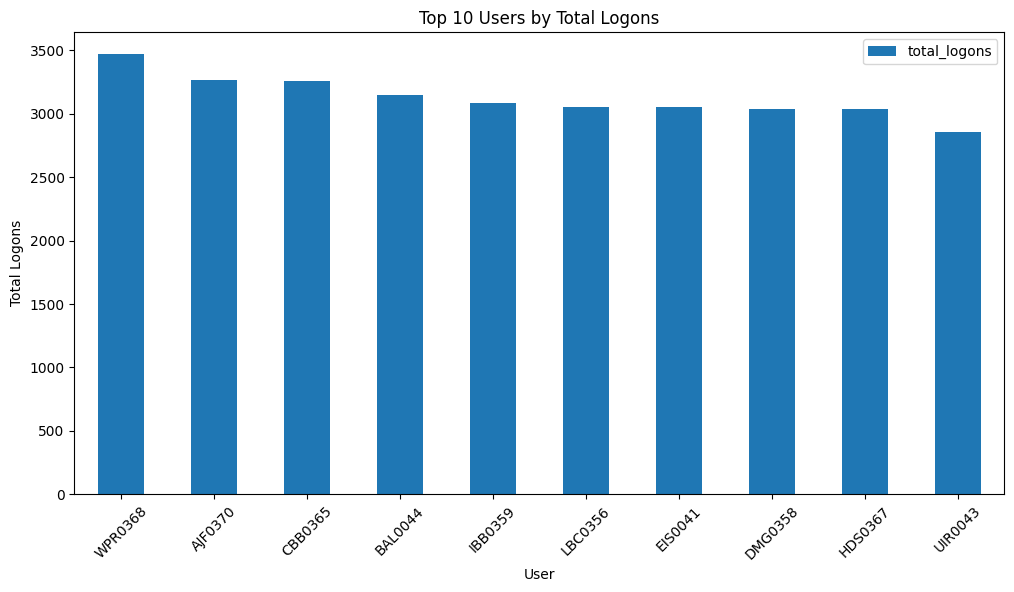

In [26]:
logon_agg.sort_values(by='total_logons', ascending=False).head(10).plot(kind='bar', x='user', y='total_logons', figsize=(12, 6))
plt.title('Top 10 Users by Total Logons') #finding the users with the most logons
plt.xlabel('User')
plt.ylabel('Total Logons')
plt.xticks(rotation=45)
plt.show()

In [27]:
pc_agg = logon_data.groupby('pc').agg(
    total_logons=('activity_Logon', 'count'),
    unique_users=('user', 'nunique'),
    first_seen=('date', 'min'),
    last_seen=('date', 'max'),
    active_days=('day_of_week', 'nunique')
).reset_index()

pc_agg.to_csv(r'D:\clean R4\pc_agg.csv', index=False)


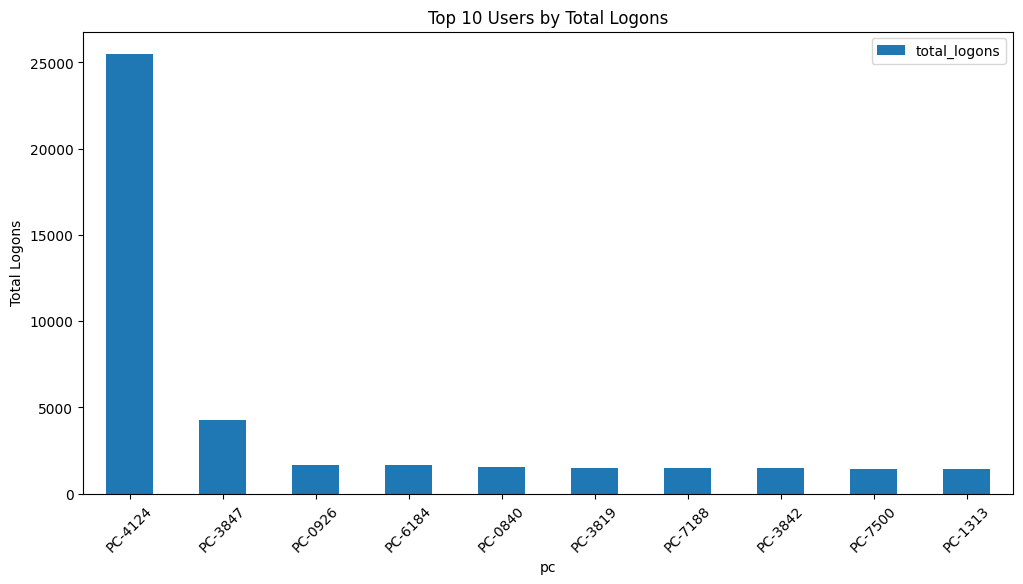

In [24]:
pc_agg.sort_values(by='total_logons', ascending=False).head(10).plot(kind='bar', x='pc', y='total_logons', figsize=(12, 6))
plt.title('Top 10 Users by Total Logons') #finding the users with the most logons
plt.xlabel('pc')
plt.ylabel('Total Logons')
plt.xticks(rotation=45)
plt.show()

In [30]:
logon_agg=pd.read_csv(r'D:\clean R4\logon_agg.csv')
pc_agg=pd.read_csv(r'D:\clean R4\pc_agg.csv')


In [31]:
logon_agg.head()

,user,total_logons,unique_pcs,first_seen,last_seen,active_days,offhour_logons,weekend_logons
0,AAE0190,692,1,2010-01-04 08:09:00,2011-05-16 18:10:00,346,346,0
1,AAF0535,328,1,2010-01-04 08:56:00,2010-08-24 16:54:00,164,0,0
2,AAF0791,692,1,2010-01-04 08:06:00,2011-05-16 17:14:00,346,0,0
3,AAL0706,692,1,2010-01-04 07:38:00,2011-05-16 16:59:00,346,346,0
4,AAM0658,458,1,2010-01-04 09:14:00,2010-11-17 21:15:00,225,234,2


In [ ]:

logon_agg.info()
logon_agg.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user            1000 non-null   object
 1   total_logons    1000 non-null   int64 
 2   unique_pcs      1000 non-null   int64 
 3   first_seen      1000 non-null   object
 4   last_seen       1000 non-null   object
 5   active_days     1000 non-null   int64 
 6   offhour_logons  1000 non-null   int64 
 7   weekend_logons  1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


,user,total_logons,unique_pcs,first_seen,last_seen,active_days,offhour_logons,weekend_logons
count,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000
unique,1000,NaN,NaN,215,431,NaN,NaN,NaN
top,ZSL0305,NaN,NaN,2010-01-04 07:45:00,2011-05-16 17:00:00,NaN,NaN,NaN
freq,1,NaN,NaN,22,20,NaN,NaN,NaN
mean,NaN,854.859000,24.271000,NaN,NaN,330.452000,343.802000,20.159000
std,NaN,426.271482,109.519944,NaN,NaN,69.157751,321.375779,72.336397
min,NaN,58.000000,1.000000,NaN,NaN,25.000000,0.000000,0.000000
25%,NaN,692.000000,1.000000,NaN,NaN,346.000000,168.000000,0.000000
50%,NaN,692.000000,1.000000,NaN,NaN,346.000000,346.000000,0.000000
75%,NaN,968.000000,2.000000,NaN,NaN,346.000000,369.000000,0.000000


In [32]:
pc_agg.head()

,pc,total_logons,unique_users,first_seen,last_seen,active_days
0,PC-0004,756,25,2010-01-04 07:53:00,2011-05-16 18:56:00,346
1,PC-0008,1379,25,2010-01-03 09:01:00,2011-05-16 18:21:00,438
2,PC-0039,530,20,2010-01-04 07:47:00,2010-12-14 18:07:00,242
3,PC-0044,780,27,2010-01-04 08:56:00,2011-05-16 18:15:00,346
4,PC-0072,778,26,2010-01-04 08:04:00,2011-05-16 17:13:00,347


In [33]:
pc_agg.info()
pc_agg.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pc            1003 non-null   object
 1   total_logons  1003 non-null   int64 
 2   unique_users  1003 non-null   int64 
 3   first_seen    1003 non-null   object
 4   last_seen     1003 non-null   object
 5   active_days   1003 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.1+ KB


,pc,total_logons,unique_users,first_seen,last_seen,active_days
count,1003,1003.000000,1003.000000,1003,1003,1003.000000
unique,1003,NaN,NaN,239,452,NaN
top,PC-9999,NaN,NaN,2010-01-04 07:45:00,2011-05-16 17:00:00,NaN
freq,1,NaN,NaN,22,20,NaN
mean,NaN,852.302094,24.198405,NaN,NaN,330.601196
std,NaN,820.388438,10.654880,NaN,NaN,70.433279
min,NaN,8.000000,1.000000,NaN,NaN,2.000000
25%,NaN,758.000000,22.000000,NaN,NaN,346.000000
50%,NaN,774.000000,25.000000,NaN,NaN,346.000000
75%,NaN,1026.000000,28.000000,NaN,NaN,347.000000
